In [3]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.linear_model import (LinearRegression, Ridge,Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
# from pybrain.utilities import percentError
# from pybrain.tools.shortcuts import buildNetwork
# from pybrain.supervised.trainers import BackpropTrainer
# from pybrain.structure.modules import SoftmaxLayer
# from pybrain.datasets.classification import ClassificationDataSet
# from pybrain.tools.validation import Validator
from sklearn.metrics import confusion_matrix

# def featureSelectionRFE():
#     from sklearn.feature_selection import RFE
#     from sklearn.linear_model import LogisticRegression
#     model = LogisticRegression()
#     # create the RFE model and select 3 attributes
#     rfe = RFE(model, 10)
#     rfe = rfe.fit(train_data[0:,1:], train_data[0:,0])
#     # summarize the selection of the attributes
#     print(rfe.support_)
#     print(rfe.ranking_)
#     print(rfe.n_features_)
#     #Check the accuracy of the model
#     rfe.score(train_data[0:,1:], train_data[0:,0])
    
def labelConversion(df):
# Discreet value integer encoder
    label_encoder = preprocessing.LabelEncoder()
    df['drugname'] = label_encoder.fit_transform(df['drugname'])
    df['route'] = label_encoder.fit_transform(df['route'])
    df['dose_unit'] = label_encoder.fit_transform(df['dose_unit'])
    df['dose_form'] = label_encoder.fit_transform(df['dose_form'])
    df['dose_freq'] = label_encoder.fit_transform(df['dose_freq'])
    df['mfr_sndr'] = label_encoder.fit_transform(df['mfr_sndr'])
    df['pt'] = label_encoder.fit_transform(df['pt'])
    df['outc_cod'] = label_encoder.fit_transform(df['outc_cod'])
    df['dose_amt'] = label_encoder.fit_transform(df['dose_amt'])
    return df    
    
    
def createDataFrame(str):
    perf_df = pd.read_csv(str ,sep=",",skipinitialspace=True,error_bad_lines=False, index_col=False, dtype='unicode')
    return perf_df  

# build a neural network
# def build_neural_network(train_num_df_X, train_y, test_num_df_X, test_y ):
 
#     #Calculating rows and columns for input dfs
#     trn_rows,trn_cols=train_num_df_X.shape
#     tst_rows,tst_cols=test_num_df_X.shape
       
#     # build train dataset
#     print("Inside build_neural_network : ")
#     print("Building train dataset")
#     train_data = ClassificationDataSet(trn_cols, 1 , nb_classes=7)
#     for k in range(len(train_num_df_X)): 
#         train_data.addSample(train_num_df_X.iloc[k],train_y.iloc[k]) 
    
#     # build test dataset
#     print("Building test dataset")
#     test_data = ClassificationDataSet(tst_cols, 1 , nb_classes=7)
#     for k in range(len(test_num_df_X)): 
#         test_data.addSample(test_num_df_X.iloc[k],test_y.iloc[k])
        
 #     print("Train Dataset input length: {}".format(len(train_data['input'])))
#     print("Train Dataset input|output dimensions are {}|{}".format(train_data.indim, train_data.outdim))
     
#     print("Train Data length: {}".format(len(train_data)))
#     print("Test Data length: {}".format(len(test_data)))
 
#     # encode with one output neuron per class
#     train_data._convertToOneOfMany()
#     test_data._convertToOneOfMany()
 
#     print("Train Data input|output dimensions are {}|{}".format(train_data.indim, train_data.outdim))
#     print("Test Data input|output dimensions are {}|{}".format(test_data.indim, test_data.outdim))
 
#     # build network (INPUT=10,HIDDEN=5,CLASSES=2,outclass=SoftmaxLayer)
#     print("Building Neural network with 5 hidden layer")
#     network = buildNetwork(train_data.indim,100,train_data.outdim,outclass=SoftmaxLayer)
 
#     # train network
#     print("Training the network, it may take a while(20-30 min)...")
#     trainer = BackpropTrainer(network,dataset=train_data,momentum=0.1,verbose=True,weightdecay=0.01)
#     trainer.trainOnDataset(train_data, 10) 
    
#     #training model on One epoch
#     print("Total epochs: {}".format(trainer.totalepochs))
 
#     # test network
#     print("Predicting the output array with the trained model")
#     output = network.activateOnDataset(test_data).argmax(axis=1)
     
#     #Neural network Percent error and accuracy    
#     print("Percent error: {}".format(percentError(output, test_data['class'])))
#     accuracy=Validator.classificationPerformance(output, test_y)
#     print("Model Accuracy: {}".format(accuracy))
#     print("Classification report for Test data %s:\n%s\n"% (network, metrics.classification_report(test_y, output)))
    
#     #Compute confusion metrics
#     cm = confusion_matrix(test_y,output)
#     print(cm)
   




In [4]:
#Creating DataFrame
print("Creating Test Dataframe...")
main_df= createDataFrame("MergedFile.csv")
print("Creating Training and Test Dataframe...")
train_df=main_df.sample(frac=0.8,random_state=200)
test_df =main_df.drop(train_df.index)

Creating Test Dataframe...
Creating Training and Test Dataframe...


In [5]:
#Setting the input parameter for Neural Network
print("#Setting the input parameter for Neural Network...")
cols_to_keep=['drugname','route','dose_amt','dose_unit','dose_form','dose_freq','mfr_sndr','pt']

#Setting the input parameter for Neural Network...


In [6]:
print("Checking all required columns in train and test dataframes")
train_num_df=labelConversion(train_df)
test_num_df= labelConversion(test_df)

Checking all required columns in train and test dataframes


In [7]:
#Setting the input parameter for Neural Network
print("Creating X and y variables for Train and Test Dataframes")
train_num_df_X = train_num_df[cols_to_keep]
outcome_num_train_y = train_num_df['outc_cod']

test_num_df_X = test_num_df[cols_to_keep]
outcome_num_test_y = test_num_df['outc_cod']

Creating X and y variables for Train and Test Dataframes


# MLE

In [48]:
new_cols_to_keep=['drugname','route','dose_amt','dose_unit','dose_form','dose_freq','mfr_sndr','pt','outc_cod']
mle_data_df = labelConversion(main_df)
mle_data_df = mle_data_df [new_cols_to_keep]

In [56]:
mle_data_df['outc_cod'].unique()

array([3, 1, 5, 4, 2, 0, 6], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normal distribution for drugName')

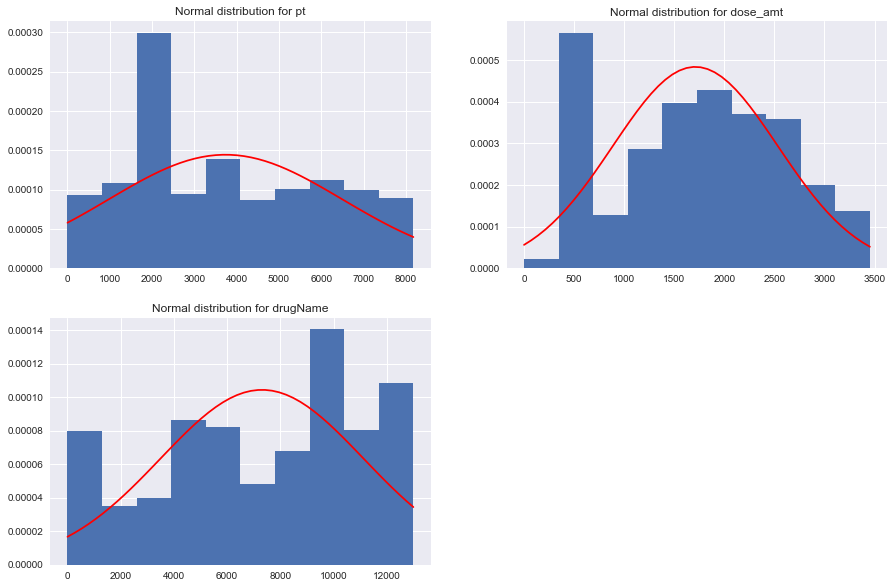

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)

fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)


x1=np.linspace(0,mle_data_df.pt.max())
x2=np.linspace(0,mle_data_df.dose_amt.max())
x3=np.linspace(0,mle_data_df.drugname.max())

ax1.hist(mle_data_df.pt,bins=10,normed=True)
ag,bg=stats.norm.fit(mle_data_df.pt)
ax1.plot(x1,stats.norm.pdf(x1,ag,bg/0.8),color='red')
ax1.set_title("Normal distribution for pt")


ax2.hist(mle_data_df.dose_amt,bins=10,normed=True)
ag,bg=stats.norm.fit(mle_data_df.dose_amt)
ax2.plot(x2,stats.norm.pdf(x2,ag,bg),color='red')
ax2.set_title("Normal distribution for dose_amt")

ax3.hist(mle_data_df.drugname,bins=10,normed=True)
ag,bg=stats.norm.fit(mle_data_df.drugname)
ax3.plot(x3,stats.norm.pdf(x3,ag,bg),color='red')
ax3.set_title("Normal distribution for drugName")

# Conclusion:
- After applying MLE we can see that the three columns that we have applied MLE to are follow normal distribution
- We can say that these columns are related to each other and can be used for making classification
- The drug amount column follows the perfect normal distribution and hence we can see that we can use MCMC sampler to sample that calumns data point 

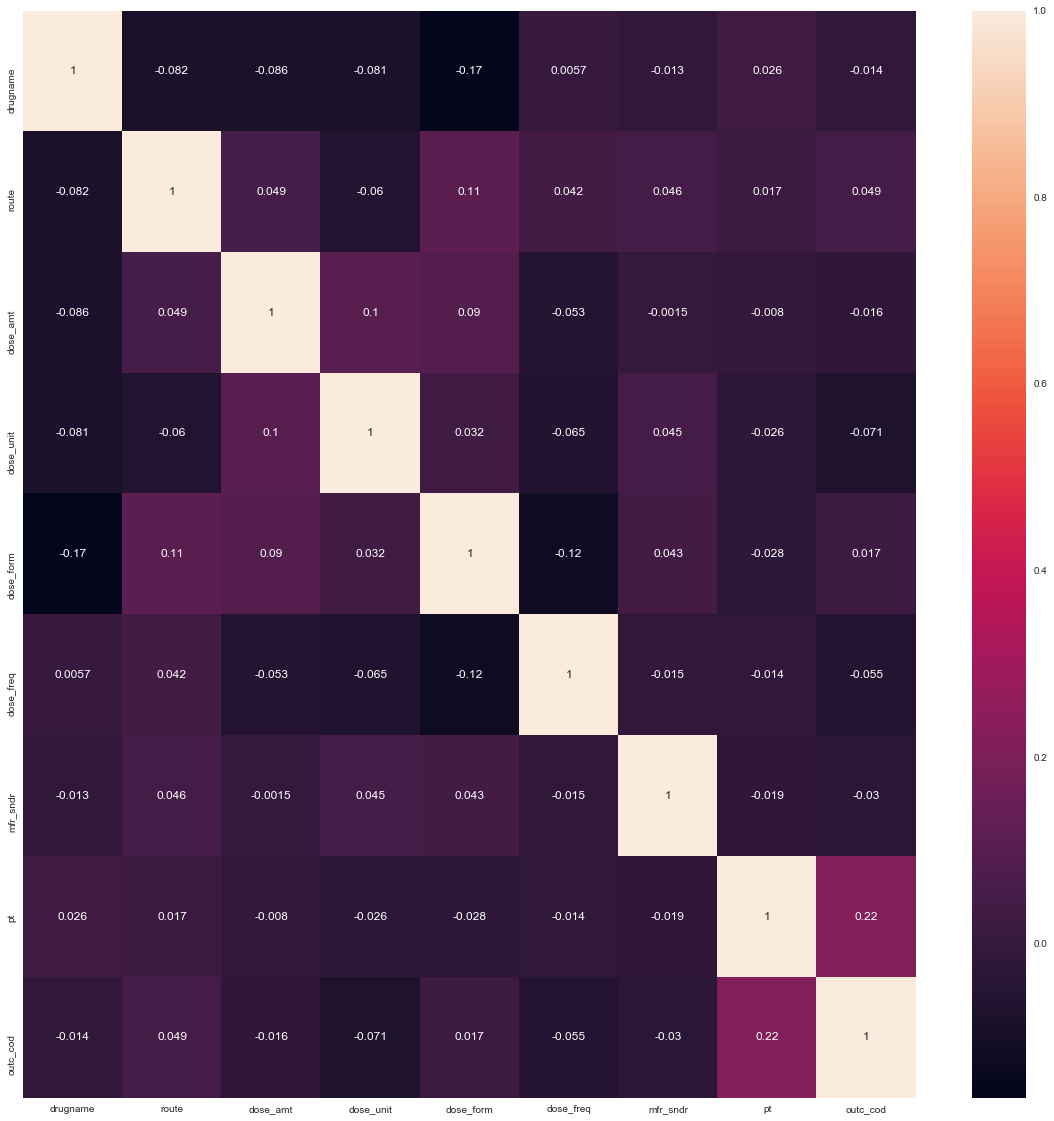

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = mle_data_df.corr()
corr1
sns.heatmap(corr1,annot=True)

# Conclusion(on correlation plot):
- As we can see we have plotted the correlation of columns which we have found in our EDA 
- The above columns are only non-null columns in dataset 
- Rest of the columns had more that 50% data null in that column so we can jot fill values in that column
- Also all these columns are in categorical values so first we had to convert all the values in numerical format
- After plotting the graph we can say that these columns are not correlated as we would like them to be for prediction
- Hence we will not get great accuracy as we dont have correlated data.
- Only few columns like pt show better correlation with our taget column which is outc_cod. 

# Classification

In [10]:
#Calling Neural Network
print("Calling neural network with train and test dataframes")
build_neural_network(train_num_df_X, outcome_num_train_y, test_num_df_X, outcome_num_test_y)

Calling neural network with train and test dataframes
Inside build_neural_network : 
Building train dataset
Building test dataset
Train Dataset input length: 352334
Train Dataset input|output dimensions are 8|1
Train Data length: 352334
Test Data length: 88083
Train Data input|output dimensions are 8|7
Test Data input|output dimensions are 8|7
Building Neural network with 5 hidden layer
Training the network, it may take a while(20-30 min)...
Total error:  0.0506097584168
Total error:  0.0504305539258
Total error:  0.0503895470438
Total error:  0.050466560144
Total error:  0.0502556262532
Total error:  0.0504292962076
Total error:  0.0506194021911
Total error:  0.0505406134015
Total error:  0.0502153517313
Total error:  0.0504480869566
Total epochs: 10
Predicting the output array with the trained model
Percent error: 65.84698522984004
Model Accuracy: 0.3415301477015996
Classification report for Test data FeedForwardNetwork-8
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <Sigmo

C:\Users\Prashant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
# from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(train_num_df_X, outcome_num_train_y)
dtree_predictions = dtree_model.predict(test_num_df_X)
accuracy = dtree_model.score(test_num_df_X, outcome_num_test_y)
cm = confusion_matrix(outcome_num_test_y, dtree_predictions)
print(accuracy)
print(cm)

0.4136666553137382
[[    0     0     0    13     0    46     0]
 [    0     0     0   966     0 16584     0]
 [    0     2     0   249     0   688     0]
 [    0    23     0  7342     0 22718     0]
 [    0     0     0   182     0   934     0]
 [    0    21     0  9132     0 29095     0]
 [    0     0     0     2     0    86     0]]


# conclusion:
- First we have tried to classify our data we used Decision Tree Classifier
- This algorithm devides your data parallely 
- Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- Decision trees decompose the attribute space into P disjoint subsets, Kr, r = 1, ... P, using decision rules (cuts) that are usually orthogonal to the attribute axes (axis parallel). Thus a decision rule can be described by a simple expression of the form ai � Ti, or ai < Ti, where Ti is some threshold, making their operation easy to comprehend by the user. Figure 4 shows part of a decision tree along with the rules that occur at each node. Given labelled attribute data, decision trees choose the most appropriate attributes with which to partition the feature space to give the best classification performance


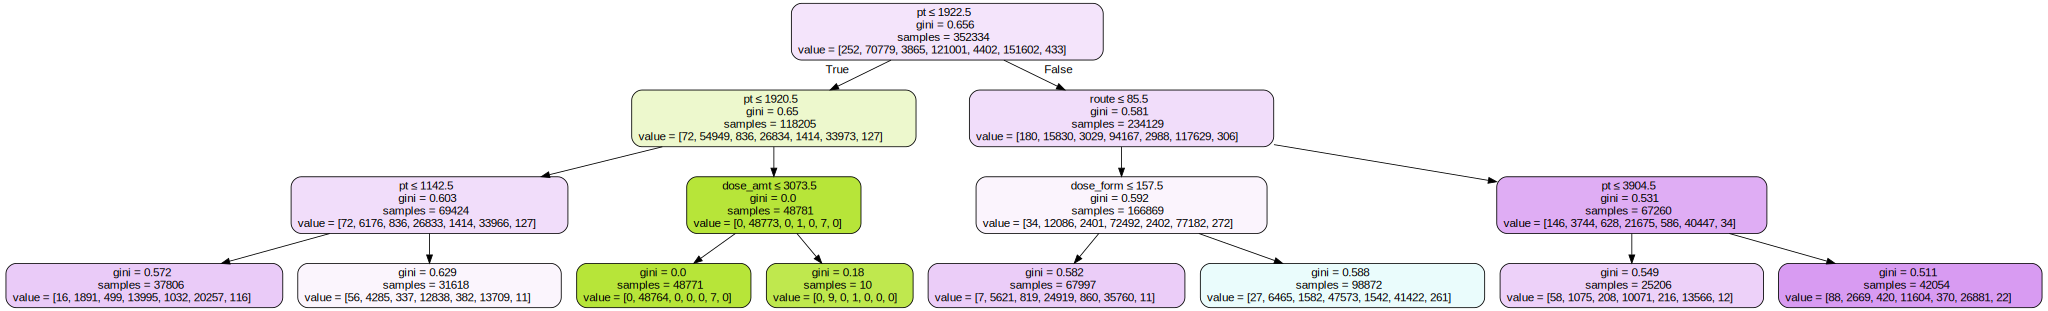

In [39]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(dtree_model, out_file=None, 
                         feature_names=train_num_df_X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Exporting the tree to pdf:

In [41]:
graph = graphviz.Source(dot_data) 
graph.render("outc_cod") 

'outc_cod.pdf'

## Now lets try and apply KNN on our dataset ans see if we get better results: 
- KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)  and would like to capture the relationship between  x  and  y . More formally, our goal is to learn a function  h:X→Y  so that given an unseen observation  x ,  h(x)  can confidently predict the corresponding output  y .

- STEP 1: Cgoose the number K of neighbors

- STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

- STEP 3: Among these K neighbors, count the number of data points to each category

- STEP 4: Assign the new data point to the category where you counted the most neighbors

In [10]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15).fit(train_num_df_X, outcome_num_train_y)
 
# accuracy on X_test
accuracy = knn.score(test_num_df_X, outcome_num_test_y)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(test_num_df_X) 
cm = confusion_matrix(outcome_num_test_y, knn_predictions)
print(cm)

0.40799019106978646
[[    0     2     0    22     2    33     0]
 [    0  3464     6  4858     7  9215     0]
 [    0    76     4   344     1   514     0]
 [    2  3166    25 10847    17 16026     0]
 [    0    66     3   392     3   652     0]
 [    3  3627    47 12937    15 21619     0]
 [    0     4     0    38     0    46     0]]


# Conclusion:
- We more or like get same accuracy when we appy KNN algorithm.
- As we can see confusion matrix there are lot of false positives 

# Gaussian Naive Bayes¶

- implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors \theta_y = (\theta_{y1},\ldots,\theta_{yn}) for each class y, where n is the number of features (in text classification, the size of the vocabulary) and \theta_{yi} is the probability P(x_i \mid y) of feature i appearing in a sample belonging to class y.
- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. Given a class variable y and a dependent feature vector x_1 through x_n, Bayes’ theorem states the following relationship:

- P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(train_num_df_X, outcome_num_train_y)
gnb_predictions = gnb.predict(test_num_df_X)
 
#print(gnb_predictions)
# accuracy on X_test
print ('accuracy')
accuracy = gnb.score(test_num_df_X,outcome_num_test_y)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(outcome_num_test_y, gnb_predictions)
print('comfusion metrix:  \n')
print(cm)

from sklearn import metrics
print('\n')
print('Report: \n')
print(metrics.classification_report(outcome_num_test_y, gnb_predictions))

accuracy
0.4408909778277307
comfusion metrix:  

[[    0     1     0     5     0    53     0]
 [    0  1059     0  1707     0 14784     0]
 [    0    19     0   227     0   693     0]
 [    0   735     0  5491     0 23857     0]
 [    0    28     0   265     0   823     0]
 [    0  1047     0  4916     0 32285     0]
 [    0     1     0    13     0    74     0]]


Report: 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        59
          1       0.37      0.06      0.10     17550
          2       0.00      0.00      0.00       939
          3       0.43      0.18      0.26     30083
          4       0.00      0.00      0.00      1116
          5       0.44      0.84      0.58     38248
          6       0.00      0.00      0.00        88

avg / total       0.41      0.44      0.36     88083



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion:

- Bayes therom gives us most correct and better results so far
- It has leaset number of false positives 
- Still we can say that accuracy is not improved 
- Noe we can pin point the reason after applying 3 algorithms that we dont have enough correlated data to get more correct acceracy 
- We may have to find more features to get correct results. 

In [47]:
from sklearn import linear_model
from sklearn import metrics

lr = linear_model.LogisticRegression()
lr.fit(train_num_df_X, outcome_num_train_y)

print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(outcome_num_train_y, lr.predict(train_num_df_X)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(outcome_num_test_y, lr.predict(test_num_df_X)))
 

Logistic regression Train Accuracy ::  0.4288998507098378
Logistic regression Test Accuracy ::  0.43451063201752893


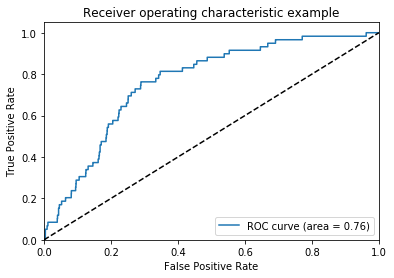

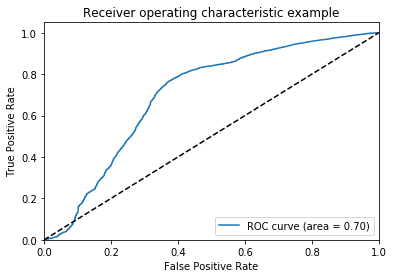

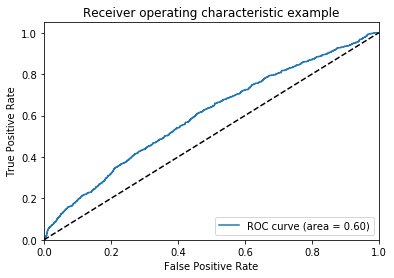

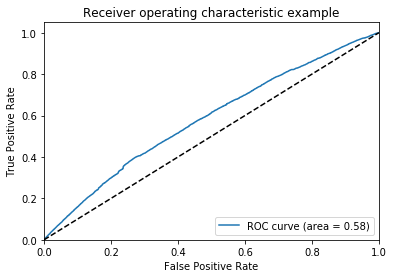

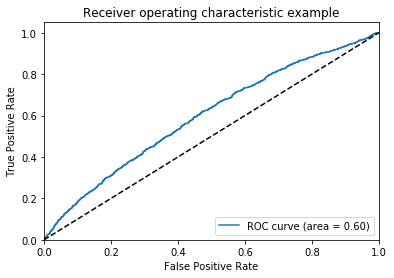

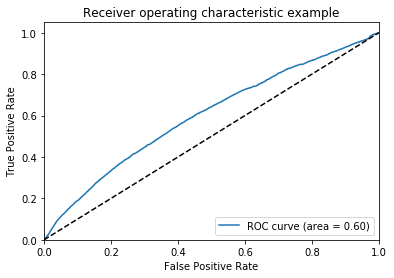

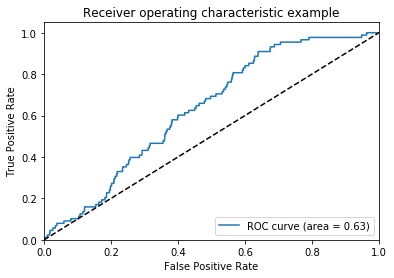

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model
import matplotlib.pyplot as plt

n_classes = 7

# classifier
clf = OneVsRestClassifier(linear_model.LogisticRegression())
y_score = clf.fit(train_num_df_X, outcome_num_train_y).decision_function(test_num_df_X)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    A=np.array(outcome_num_test_y)==i
    A=A.astype(int)
    fpr[i], tpr[i], _ = roc_curve(A, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [48]:
cm = confusion_matrix(outcome_num_test_y, lr.predict(test_num_df_X))
print(cm)

[[    0     7     0     1     0    51     0]
 [    0  3526     0  2418     0 11606     0]
 [    0    87     0   157     0   695     0]
 [    0  3409     0  4370     0 22304     0]
 [    0   203     0   141     0   772     0]
 [    0  4396     0  3475     0 30377     0]
 [    0    22     0     4     0    62     0]]


In [50]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_num_df_X, outcome_num_train_y)
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(outcome_num_train_y, mul_lr.predict(train_num_df_X)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(outcome_num_test_y, mul_lr.predict(test_num_df_X)))
cm = confusion_matrix(outcome_num_test_y, mul_lr.predict(test_num_df_X))
print(cm)

Multinomial Logistic regression Train Accuracy ::  0.4272593618555121
Multinomial Logistic regression Test Accuracy ::  0.43650874743139995
[[    0     2     0     4     0    53     0]
 [    0   366     0  6219     0 10965     0]
 [    0    18     0   334     0   587     0]
 [    0   978     0 10954     0 18151     0]
 [    0    54     0   410     0   652     0]
 [    0  1027     0 10092     0 27129     0]
 [    0     8     0    28     0    52     0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
